# An Introduction to Quantum Coding with Qiskit

In [44]:
#imports
from IPython.display import Latex
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute
from qiskit.circuit.library import *
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram, array_to_latex

## Workshop contents
- Quantum Computing basics - recap
- Introduction to Quantum Gates and Circuits
- Run your first Quantum Circuit - Bell State
- Solving problems with Quantum Computers
- Deutsch-Jozsa Algorithm
- Run on real hardware

## Recap - Qubits & Superposition
<img src="superposition.png" alt="" style="height: 500px;"/>

## Recap - Measurement
![](measure.png)
50:50 chance 0 or 1

## Recap - Entanglement
<img src="spooky-action-cartoon.jpg" alt="" style="height: 500px;"/>

## Circuits - Classical vs Quantum

<div style="display: flex; flex-direction:row">
    <img src="circuit-classical.png" alt="" style="height: 300px; padding: 10px"/>
    <img src="circuit-example-bw.png" alt="" style="height: 300px; width: 500px; padding: 10px"/>
</div>

![](circuit-example.png)

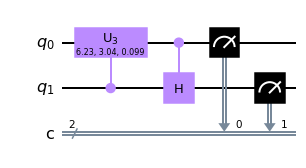

In [48]:
rand = random_circuit(2, 2, measure=True)
rand.draw('mpl')

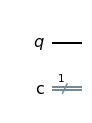

In [50]:
# qc = QuantumCircuit(1)
qc = QuantumCircuit(1, 1)
qc.draw('mpl')

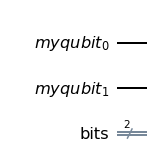

In [51]:
qr = QuantumRegister(2, name='myqubit')
cr = ClassicalRegister(2, name='bits')
qc = QuantumCircuit(cr, qr)
qc.draw('mpl')

## Quantum Gates

3 ways to represent Quantum Gates:
- circuit box model
- Dirac notation
- matrices


## Let's start with bits - 0 & 1

### bitstring = 0
Dirac notation = $|0\rangle$  
matrix = $ \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, $

### bitstring = 1
Dirac notation = $ |1\rangle $  
matrix = $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## X Gate - single qubit gate

- equivalent to a classical NOT gate (i.e. a bit flip)
- flips the input bit to opposite sign
- 0 -> 1
- 1 -> 0

![](classical-not.jpg)

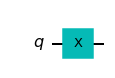

In [54]:
qc_x = QuantumCircuit(1)
qc_x.x(0)
qc_x.draw('mpl')

In [55]:
print('X (1q gate)')
xgate = XGate()
array_to_latex(xgate.to_matrix())

X (1q gate)


<IPython.core.display.Latex object>

**for an X gate applied to a qubit in state 0**

Dirac notation = $X|0\rangle$ = $|1\rangle$

matrix = $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0*1 + 1*0 \\ 1*1 + 0*0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

**for an X gate applied to a qubit in state 1**

Dirac notation = $X|1\rangle$ = $|0\rangle$

matrix = $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0*0 + 1*1 \\ 1*0 + 0*1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$


Applying a gate to a quantum state = matrix multiplication

## Haddamard Gate

- no classical equivalent
- puts a qubit into superposition

In [56]:
print('H (1q gate)')
hgate = HGate()
array_to_latex(hgate.to_matrix())

H (1q gate)


<IPython.core.display.Latex object>

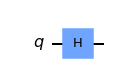

In [57]:
qc_h = QuantumCircuit(1)
qc_h.h(0)
qc_h.draw('mpl')

**for an H gate applied to a qubit in state 0**

Dirac notation = $H|0\rangle$ = $|+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

matrix = $ \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}$


**for an H gate applied to a qubit in state 1**

Dirac notation = $H|1\rangle$ = $|-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

matrix = $ \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## H & X are Unitary Gates

- They are reversible
- HH = I
- XX = I

$$ X|0\rangle \rightarrow |1\rangle ~~~~~~~~ X|1\rangle \rightarrow |0\rangle \\ $$

$$H|0\rangle \rightarrow |+\rangle ~~~~~~~~ H|+\rangle \rightarrow |0\rangle \\ $$

$$H|1\rangle \rightarrow |-\rangle ~~~~~~~~ H|-\rangle \rightarrow |1\rangle$$

## Controlled-Not Gate - 2 qubit gate
- CNOT
- CX


In [58]:
print('CX (2q gate)')
cxgate = CXGate()
array_to_latex(cxgate.to_matrix())

CX (2q gate)


<IPython.core.display.Latex object>

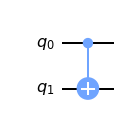

In [59]:
qc2 = QuantumCircuit(2)
qc2.cx(0,1)
qc2.draw('mpl')

If q0 = 1, q1 flips  
if q0 = 0, q1 doesn't flip


so if q0 = 1, then q1 also = 1  
and if q0 = 0, then q1 also = 0

Dirac notation:
$CNOT|00\rangle$

## Run your first Quantum Circuit - The Bell State

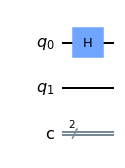

In [107]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.reverse_bits()
circ.draw('mpl')

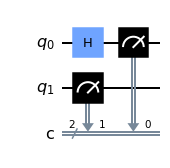

In [106]:
circ
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [62]:
sim = Aer.get_backend('aer_simulator')
transpiled = transpile(circ, sim)
result = sim.run(transpiled, shots=1000).result()
counts = result.get_counts()
print(counts)

{'01': 508, '00': 492}


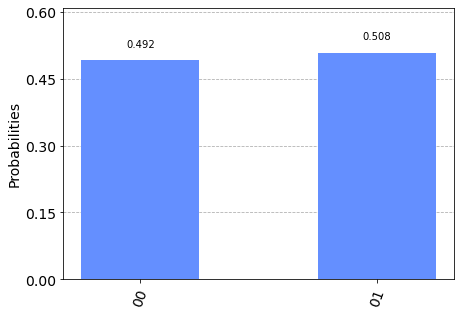

In [63]:
plot_histogram(counts)

## The Bell State

- Simplest implementation of entanglement
- Add a CNOT: control = q0 target = q1

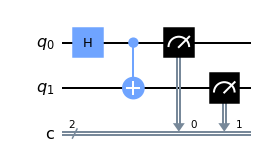

In [64]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0,1)
bell.measure([0,1], [0,1])
bell.draw('mpl')

Dirac notation:

$ CNOT|0{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

In [65]:
sim = Aer.get_backend('aer_simulator')
transpiled_bell = transpile(bell, sim)
result = sim.run(transpiled_bell, shots=1000).result()
bell_counts = result.get_counts()
print(bell_counts)

{'00': 496, '11': 504}


{'00': 496, '11': 504}


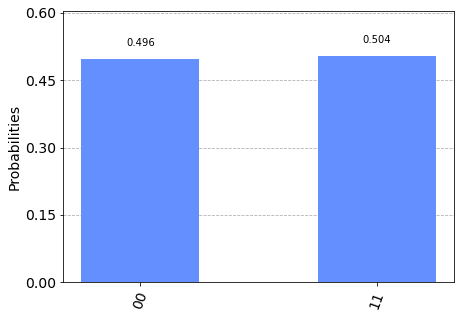

In [66]:
print(bell_counts)
plot_histogram(bell_counts)

## Solving Problems with Quantum Computers
With universal quantum computation we could implement any classical computation, but not every algorithm can be implemented in a quantum computer efficiently (taking advantage of quantum features).

Example of things that a quantum computer can do "faster":

- Simulating quantum systems
    - Varational Quantum Eigensolver (simulating molecules)
- Factor numbers in polynomial time (Shor's algorithm 1994)
    - Quantum Fourier transform
- Optimization problems (for example, for ML)
    - Quadratic speedup search in an unsorted list (Grover's algorithm 1996)

## Solving Problems with Quantum Computers
![](full-diagram.png "Solving Problems on Quantum Computers")

## The Problem - constant or balanced?

Back to classical! 4 classical operations on 1 bit:

![](const-balanced.png)


![](black-box.png)

![](bb-example.png)

For classical computation you would need to run f(x) *at least* twice to know what's in the black box. O(n/2 + 1)

![](diagram-2.png)

## The Quantum Algorithm - Deutsch-Jozsa

- only need to run f(x) once to know if constant or balanced. O(1)
- published in 1992, first example of a quantum algorithm that performs better than the best classical algorithm.





![](diagram-3.png)

## Step 1 - prepare the oracles

![](bb-quantum.png)

- Oracle 1 = Identity
- Oracle 2 = Negation
- Oracle 3 = Constant-0
- Oracle 4 = Constant-1

## Oracle 1 - Identity

![](oracle1.png)

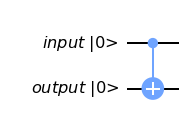

In [86]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
identity = QuantumCircuit(input, output, name='oracle')
identity.cx(input, output)
oracle1 = identity.to_instruction() # save to instruction for later
identity.draw('mpl', initial_state=True)

## Oracle 2 - Negation

![](oracle2.png)

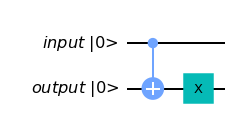

In [87]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
invert = QuantumCircuit(input, output, name='oracle')
invert.cx(input, output)
invert.x(output)
oracle2 = invert.to_instruction() # save to instruction for later
invert.draw('mpl', initial_state=True)

## Oracle 3 - Constant-0

![](oracle3.png)

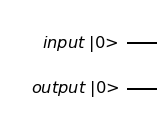

In [88]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant0 = QuantumCircuit(input, output, name='oracle')
oracle3 = constant0.to_instruction() # save to instruction for later
constant0.draw('mpl', initial_state=True)

## Oracle 4 - Constant-1

![](oracle4.png)

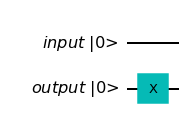

In [89]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant1 = QuantumCircuit(input, output, name='oracle')
constant1.x(output)
oracle4 = constant1.to_instruction() # save to instruction for later
constant1.draw('mpl', initial_state=True)

![](all-oracles.png)

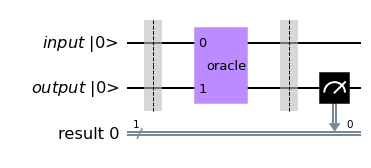

In [96]:
# run oracles just to test
result = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(input, output, result)
circuit.barrier()
circuit.compose(oracle4, inplace=True) 
circuit.barrier()
circuit.measure(output, result)
circuit.draw('mpl', initial_state=True)

In [97]:
sim = Aer.get_backend('aer_simulator')
execute(circuit, backend=sim, shots=1000).result().get_counts()

{'1': 1000}

## Step 2 - Create a Deutsch-Jozsa Circuit with an Oracle

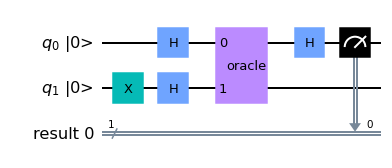

In [98]:
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle1, [qr[0], qr[1]]) # <-- you can replace here for other oracles
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw('mpl', initial_state=True, justify="right")

In [99]:
# if balanced, q0 will be 1, if constant q0 will be 0
counts = execute(circuit, backend=sim, shots=1).result().get_counts()
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
counts

{'BALANCED': 1, 'CONSTANT': None}

# wait... WHAT?! Why?!

![](all-oracles.png)

The difference between balanced/constant is the existance of a $\text{CNOT}$ gate in the oracle.
In essence, the only thing that Deutsch does is **detecting that $\text{CNOT}$**.

How can you detect that CNOT? The oracle box is closed.

Thanks to a trick called *phase kickback*. If you understand phase kickback you
will be able to understand many other algorithms.

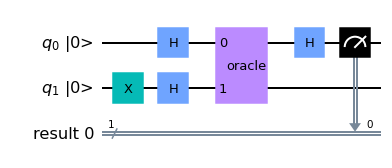

In [100]:
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle1, [qr[0], qr[1]]) # <-- you can replace here for other oracles
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw('mpl', initial_state=True, justify="right")

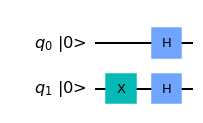

In [101]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.h(1)

circuit.draw('mpl', initial_state=True, justify='right')

Algebra!  

remember: 
$H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \rightarrow q_0 \\ $
$H|1\rangle = |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \rightarrow q_1 $

 
therefore  $\begin{gather*} q_1 q_0 \\ |-+\rangle  \\\end{gather*}  = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$  

(Qiskit's least significant bit has the lowest index)

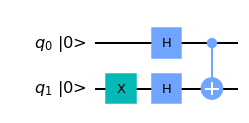

In [102]:
circuit2 = QuantumCircuit(2)
circuit2.h(0)
circuit2.x(1)
circuit2.h(1)
circuit2.cx(0,1)

circuit2.draw('mpl', initial_state=True, justify='right')

$CNOT|-+\rangle = CNOT\frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) = \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)$ 

factor out:
$
\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \begin{gather*} 
q_1 q_0 \\
|--\rangle
\end{gather*}\\
$

q0 has changed sign because of presence of CNOT

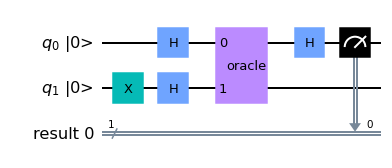

In [103]:
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle1, [qr[0], qr[1]]) # <-- you can replace here for other oracles
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw('mpl', initial_state=True, justify="right")

Circuit identities:

$H|0\rangle \rightarrow |+\rangle \\
H|1\rangle \rightarrow |-\rangle$

$H|+\rangle \rightarrow |0\rangle \\
H|-\rangle \rightarrow |1\rangle$

![](balanced-circ.png)

![](constant-circ.png)

![](full-diagram.png)

## Run Deutsch-Jozsa on real hardware

In [108]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Go to https://quantum-computing.ibm.com/
# Register
# On your welcome page you should see API token field which you can copy and use during lab
# IBMQ.save_account("<token>")

provider = IBMQ.load_account()

least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))

least_busy_device

ibmqfactory.load_account:WARNING:2022-04-06 16:25:04,665: Credentials are already in use. The existing account in the session will be replaced.


<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

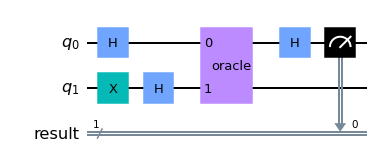

In [109]:
circuit.draw('mpl')

In [110]:
job = execute(circuit, backend=least_busy_device, shots=1000)

In [111]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [112]:
job.wait_for_final_state()
job.status()

<JobStatus.DONE: 'job has successfully run'>

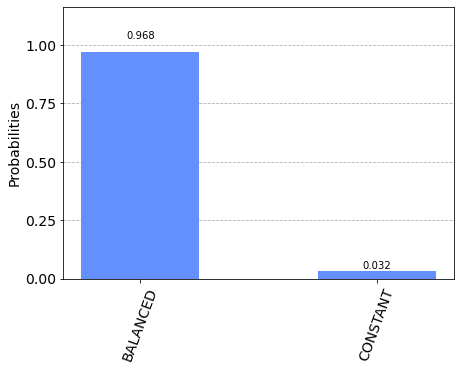

In [113]:
counts = job.result().get_counts()
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)  # wrong answer
plot_histogram(counts)

More info, more qubits: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html